Use Labeled faces dataset (having dimensions nearly 3000) available in sklearn. Apply PCA to  reduce the dimensions of this dataset. 

In [1]:
#importing labeled faces dataset
from sklearn.datasets import fetch_lfw_people 
faces=fetch_lfw_people(min_faces_per_person=60)

In [2]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [ ]:
#applying pca to reduce dimensions 
from sklearn.decomposition import PCA as RandomizedPCA
pca=RandomizedPCA(150).fit(faces.data)
components=pca.transform(faces.data)
projected=pca.inverse_transform(components)

Text(0, 0.5, 'cumulative explained variance')

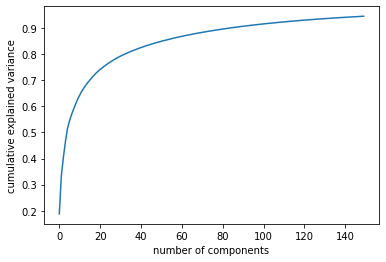

In [5]:
#plotting pca components against variance
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, '150-dim\nreconstruction')

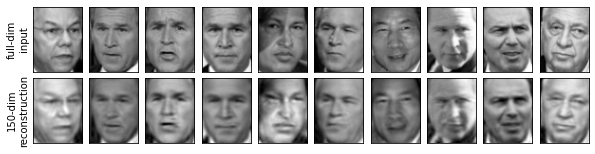

In [6]:
#plotting the faces
fig, ax=plt.subplots(2, 10, figsize=(10, 2.5), subplot_kw={'xticks':[], 'yticks':[]}, 
                     gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')